In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import umap.umap_ as umap

In [3]:
NO_DISEASE_COLOR = '#a1c9f4'  # Xanh pastel
DISEASE_COLOR = '#ff9f80'     # Cam pastel
COLOR_PALETTE = [NO_DISEASE_COLOR, DISEASE_COLOR]

In [4]:
data = pd.read_csv('data/heart_disease_health_indicators_BRFSS2015.csv')
data.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  

[5 rows x 22 columns]

In [5]:
X, y = data.drop('HeartDiseaseorAttack', axis=1), data['HeartDiseaseorAttack']

## 1. PCA

#### 1.1. On unscaled data

PCA on raw data:
Shape of transformed data: (253680, 6)
Explained variance ratio: [0.48178557 0.2199392  0.21080534 0.04774759 0.02090783 0.00428683]
Cumulative explained variance: [0.48178557 0.70172477 0.91253011 0.9602777  0.98118553 0.98547236]


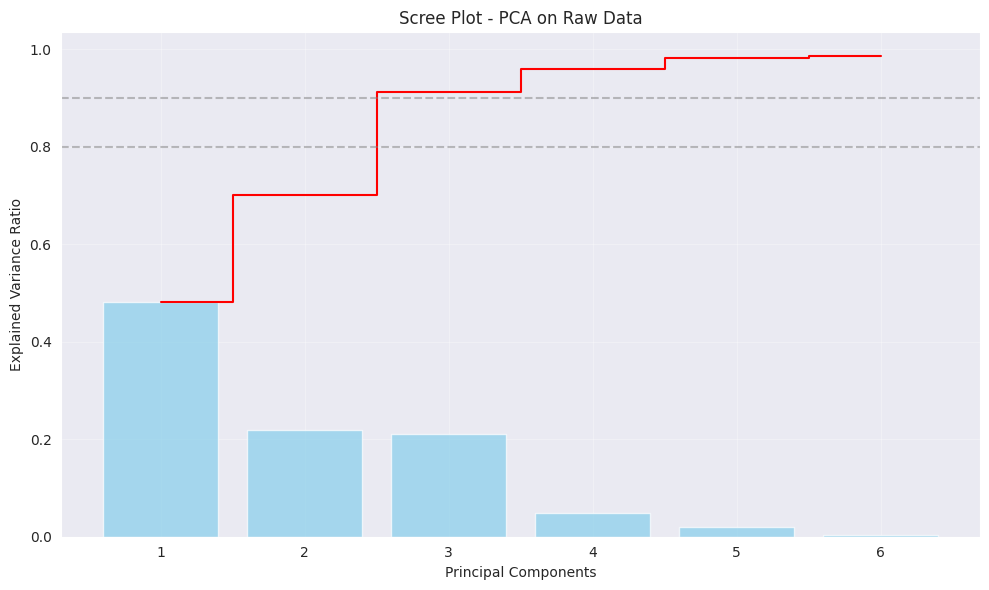

In [6]:
pca_raw = PCA(n_components=6)
pca_raw_transformed = pca_raw.fit_transform(X)

# explained variance
print("PCA on raw data:")
print(f"Shape of transformed data: {pca_raw_transformed.shape}")
explained_var_raw = pca_raw.explained_variance_ratio_
print(f"Explained variance ratio: {explained_var_raw}")
print(f"Cumulative explained variance: {np.cumsum(explained_var_raw)}")

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var_raw) + 1), explained_var_raw, alpha=0.7, color='skyblue')
plt.step(range(1, len(explained_var_raw) + 1), np.cumsum(explained_var_raw), where='mid', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - PCA on Raw Data')
plt.axhline(y=0.8, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=0.9, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pictures/pca/raw_data/pca_raw_scree_plot.jpg', dpi=300)

Visualize:

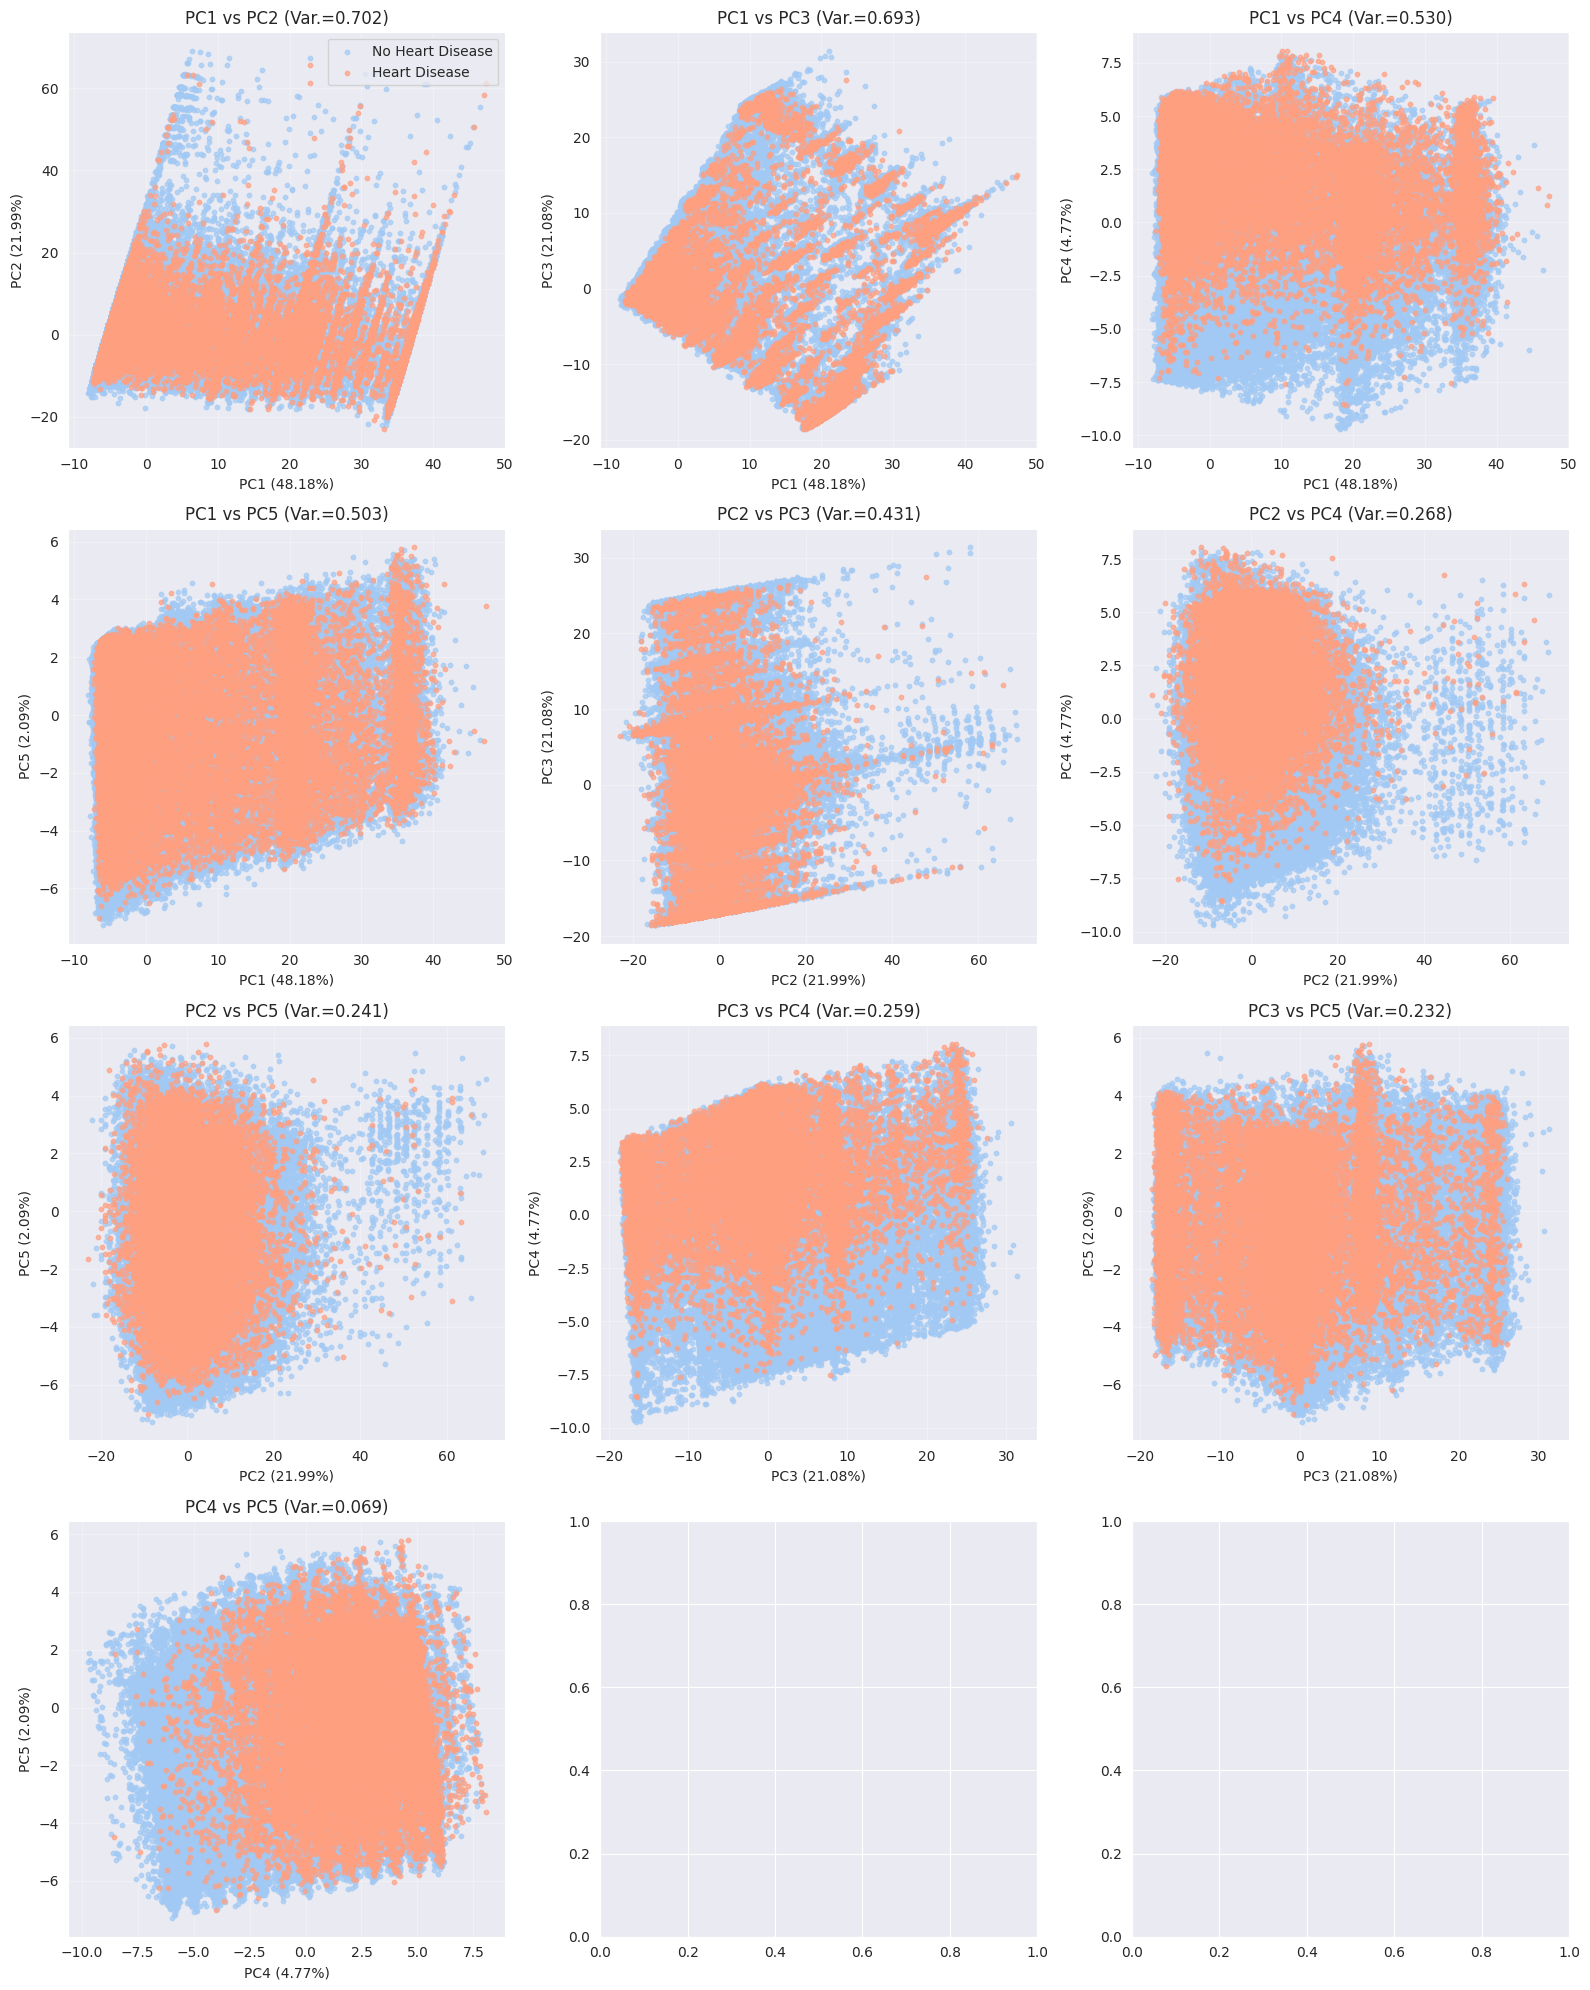

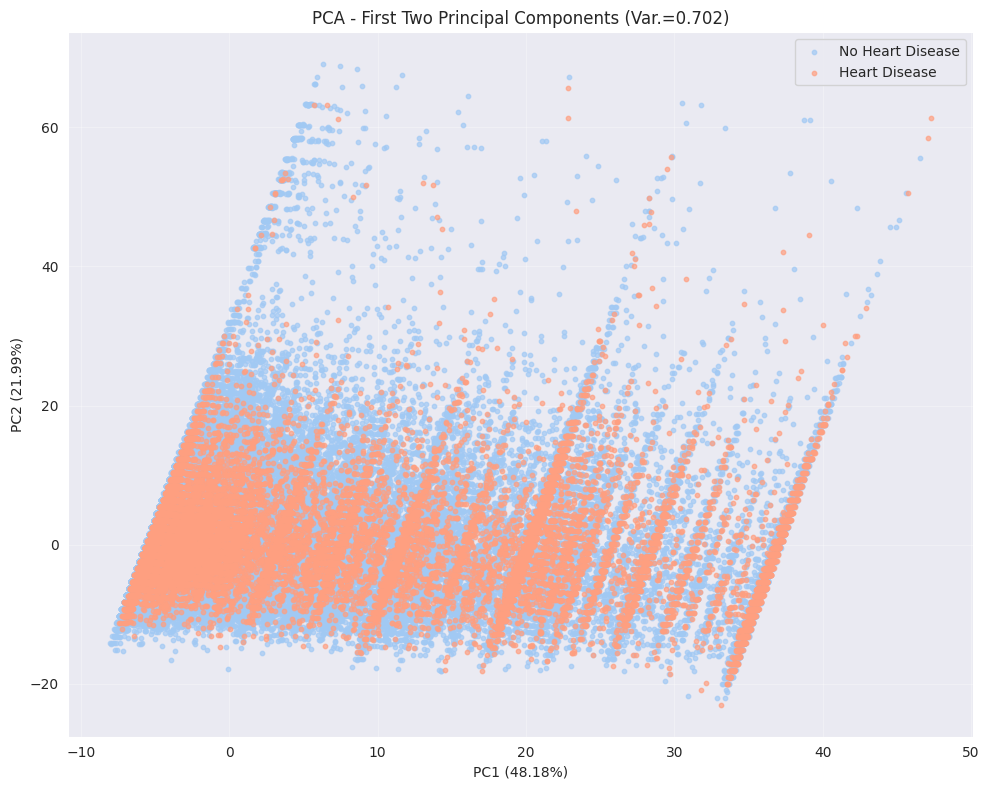

In [8]:
pca_transformed0 = pca_raw_transformed[y == 0.0, :]  # no heart disease
pca_transformed1 = pca_raw_transformed[y == 1.0, :]  # heart disease

fig, axes = plt.subplots(4, 3, figsize=(16, 20))
axes = axes.flatten()

# iterate over all combination
for idx, (i, j) in enumerate(itertools.combinations(range(5), 2)):
    axes[idx].scatter(pca_transformed0[:, i], pca_transformed0[:, j], 
                        c=NO_DISEASE_COLOR, s=10, alpha=0.7, label='No Heart Disease')
    axes[idx].scatter(pca_transformed1[:, i], pca_transformed1[:, j], 
                        c=DISEASE_COLOR, s=10, alpha=0.7, label='Heart Disease')
    axes[idx].set_title(f'PC{i+1} vs PC{j+1} (Var.={explained_var_raw[i] + explained_var_raw[j]:.3f})')
    axes[idx].set_xlabel(f'PC{i+1} ({explained_var_raw[i]:.2%})')
    axes[idx].set_ylabel(f'PC{j+1} ({explained_var_raw[j]:.2%})')
    axes[idx].grid(True, alpha=0.3)
    
    # add legend for first figure
    if idx == 0:
        axes[idx].legend()

plt.tight_layout()
plt.savefig('pictures/pca/raw_data/pca_component_pairs.jpg', dpi=300)
plt.show()

# first two components
plt.figure(figsize=(10, 8))
plt.scatter(pca_transformed0[:, 0], pca_transformed0[:, 1], 
           c=NO_DISEASE_COLOR, s=10, alpha=0.7, label='No Heart Disease')
plt.scatter(pca_transformed1[:, 0], pca_transformed1[:, 1], 
           c=DISEASE_COLOR, s=10, alpha=0.7, label='Heart Disease')
plt.title(f'PCA - First Two Principal Components (Var.={explained_var_raw[0] + explained_var_raw[1]:.3f})')
plt.xlabel(f'PC1 ({explained_var_raw[0]:.2%})')
plt.ylabel(f'PC2 ({explained_var_raw[1]:.2%})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('pictures/pca/raw_data/pca_first_two_components.jpg', dpi=300)

#### 1.2. On scaled data


PCA on scaled data:
Shape of transformed data: (253680, 6)
Explained variance ratio: [0.16887932 0.08353438 0.06489342 0.05663571 0.05470661 0.05331009]
Cumulative explained variance: [0.16887932 0.2524137  0.31730712 0.37394283 0.42864944 0.48195953]


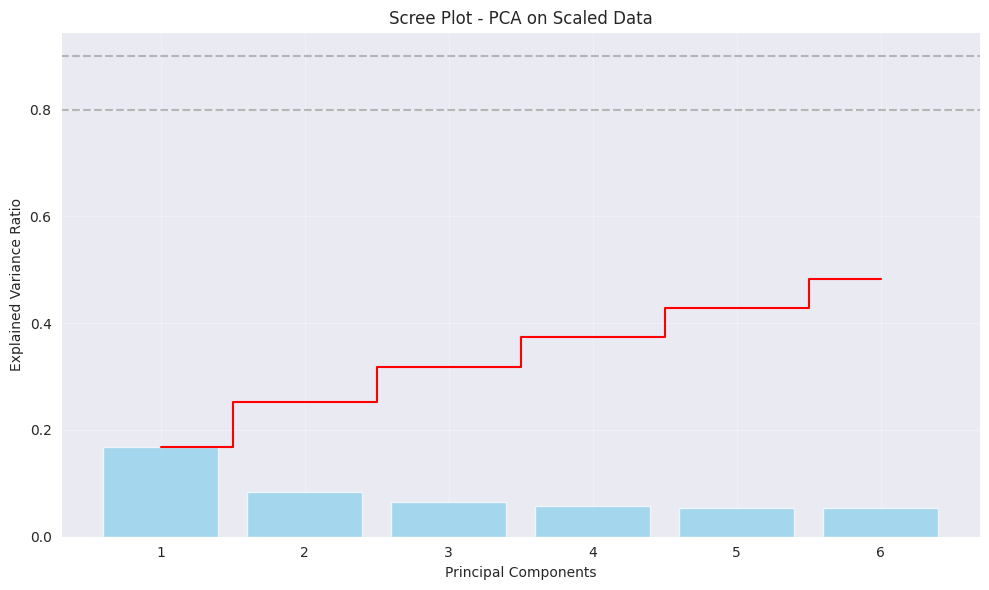

In [10]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pca on scaled data
pca = PCA(n_components=6)
pca_transformed = pca.fit_transform(X_scaled)

# explained variance
print("\nPCA on scaled data:")
print(f"Shape of transformed data: {pca_transformed.shape}")
explained_var = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_var}")
print(f"Cumulative explained variance: {np.cumsum(explained_var)}")

# scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var) + 1), explained_var, alpha=0.7, color='skyblue')
plt.step(range(1, len(explained_var) + 1), np.cumsum(explained_var), where='mid', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - PCA on Scaled Data')
plt.axhline(y=0.8, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=0.9, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pictures/pca/scaled_data/pca_scaled_scree_plot.jpg', dpi=300)

Visualize:

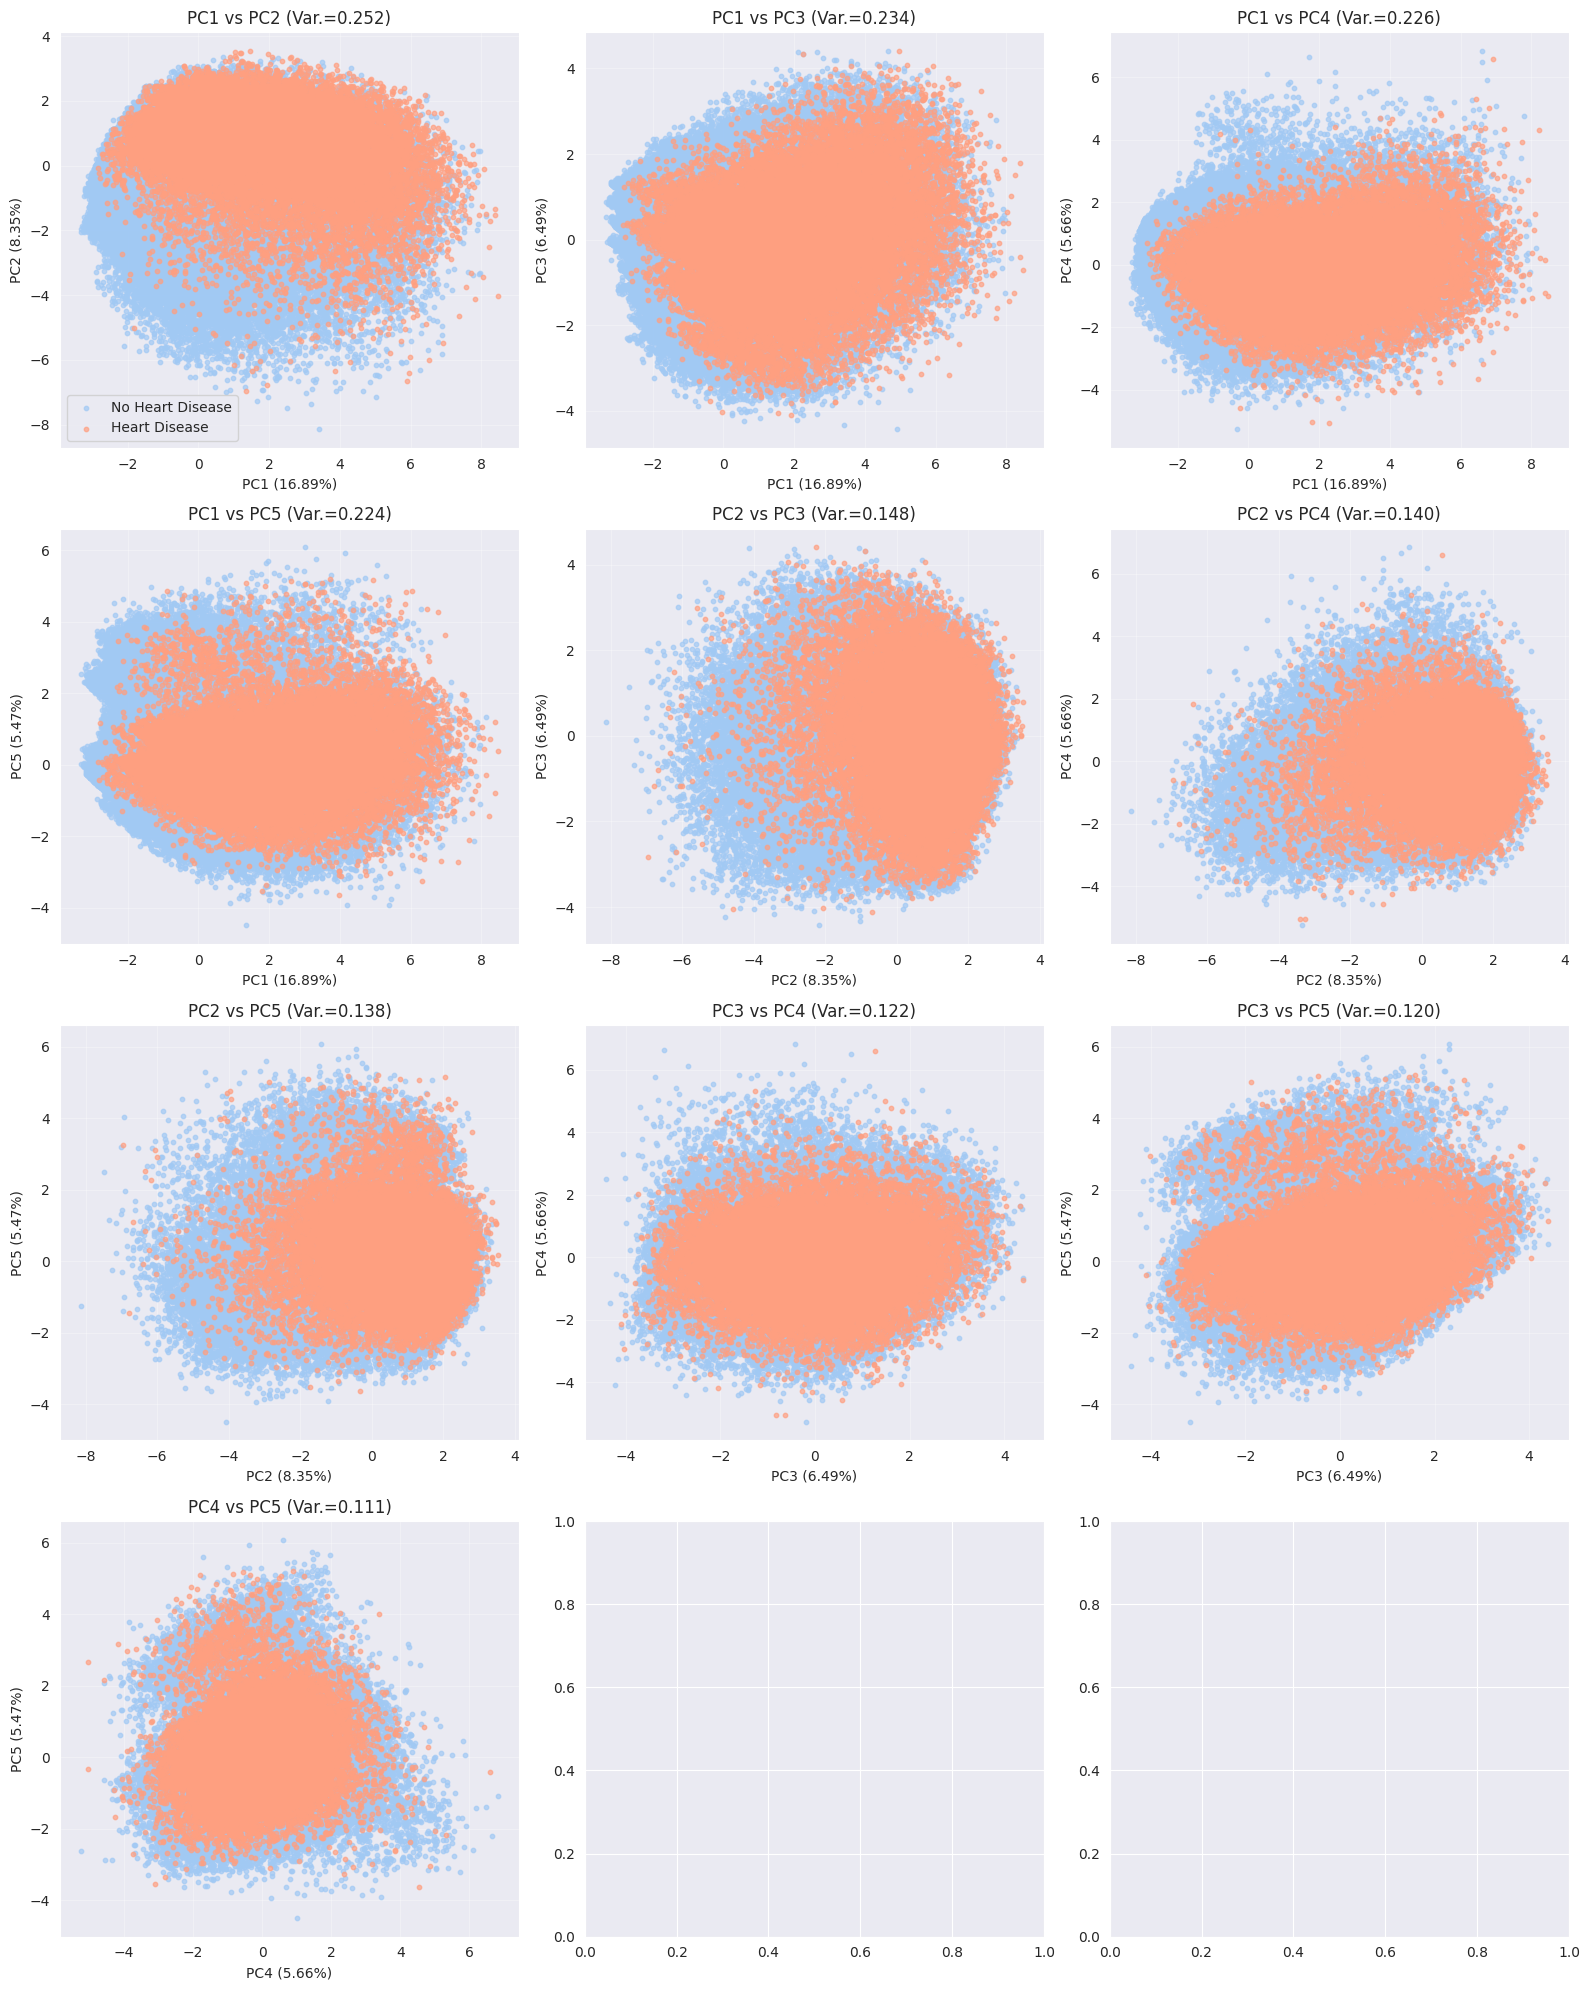

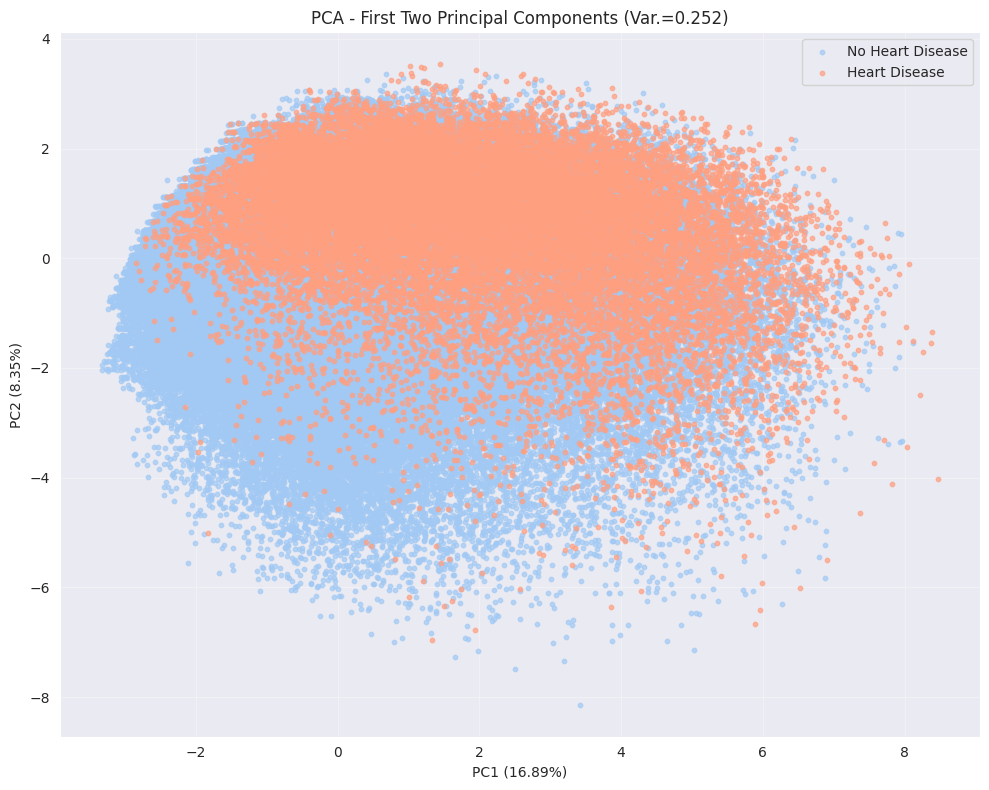

In [11]:
pca_transformed0 = pca_transformed[y == 0.0, :]  # no heart disease
pca_transformed1 = pca_transformed[y == 1.0, :]  # heart disease

fig, axes = plt.subplots(4, 3, figsize=(16, 20))
axes = axes.flatten()

# iterate over all combination
for idx, (i, j) in enumerate(itertools.combinations(range(5), 2)):
    axes[idx].scatter(pca_transformed0[:, i], pca_transformed0[:, j], 
                        c=NO_DISEASE_COLOR, s=10, alpha=0.7, label='No Heart Disease')
    axes[idx].scatter(pca_transformed1[:, i], pca_transformed1[:, j], 
                        c=DISEASE_COLOR, s=10, alpha=0.7, label='Heart Disease')
    axes[idx].set_title(f'PC{i+1} vs PC{j+1} (Var.={explained_var[i] + explained_var[j]:.3f})')
    axes[idx].set_xlabel(f'PC{i+1} ({explained_var[i]:.2%})')
    axes[idx].set_ylabel(f'PC{j+1} ({explained_var[j]:.2%})')
    axes[idx].grid(True, alpha=0.3)
    
    # add legend for first figure
    if idx == 0:
        axes[idx].legend()

plt.tight_layout()
plt.savefig('pictures/pca/scaled_data/pca_component_pairs.jpg', dpi=300)
plt.show()

# first two components
plt.figure(figsize=(10, 8))
plt.scatter(pca_transformed0[:, 0], pca_transformed0[:, 1], 
           c=NO_DISEASE_COLOR, s=10, alpha=0.7, label='No Heart Disease')
plt.scatter(pca_transformed1[:, 0], pca_transformed1[:, 1], 
           c=DISEASE_COLOR, s=10, alpha=0.7, label='Heart Disease')
plt.title(f'PCA - First Two Principal Components (Var.={explained_var[0] + explained_var[1]:.3f})')
plt.xlabel(f'PC1 ({explained_var[0]:.2%})')
plt.ylabel(f'PC2 ({explained_var[1]:.2%})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('pictures/pca/scaled_data/pca_first_two_components.jpg', dpi=300)

**NHẬN XÉT**: Giảm chiều PCA trên dữ liệu đã chuẩn hoá cho độ tách biệt rõ ràng hơn so với trước khi chuẩn hoá, tuy nhiên, kết quả nhìn chung vẫn chưa thực sự tốt.

## 2. LDA

#### 2.1. On unscaled data


LDA:
Shape of transformed data: (253680, 1)


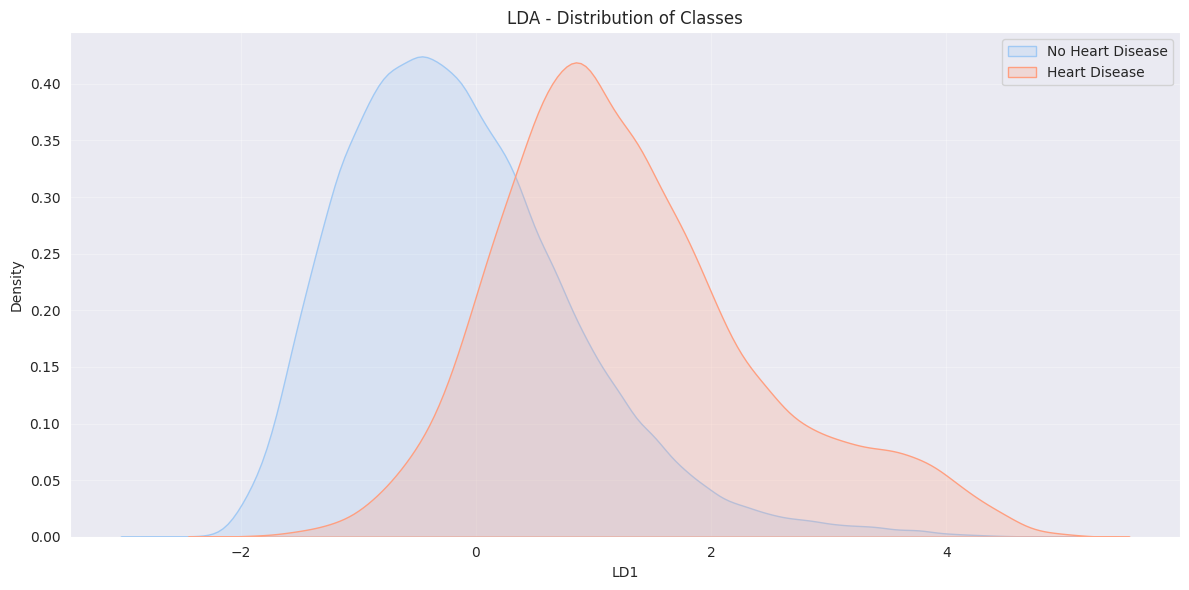

In [12]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda_transformed = lda.fit_transform(X, y)

print("\nLDA:")
print(f"Shape of transformed data: {lda_transformed.shape}")

plt.figure(figsize=(12, 6))
sns.kdeplot(lda_transformed[y == 0.0][:, 0], fill=True, color=NO_DISEASE_COLOR, label='No Heart Disease')
sns.kdeplot(lda_transformed[y == 1.0][:, 0], fill=True, color=DISEASE_COLOR, label='Heart Disease')
plt.title('LDA - Distribution of Classes')
plt.xlabel('LD1')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('pictures/lda/raw_lda_distribution.jpg', dpi=300)

#### 2.2. On scaled data


LDA:
Shape of transformed data: (253680, 1)


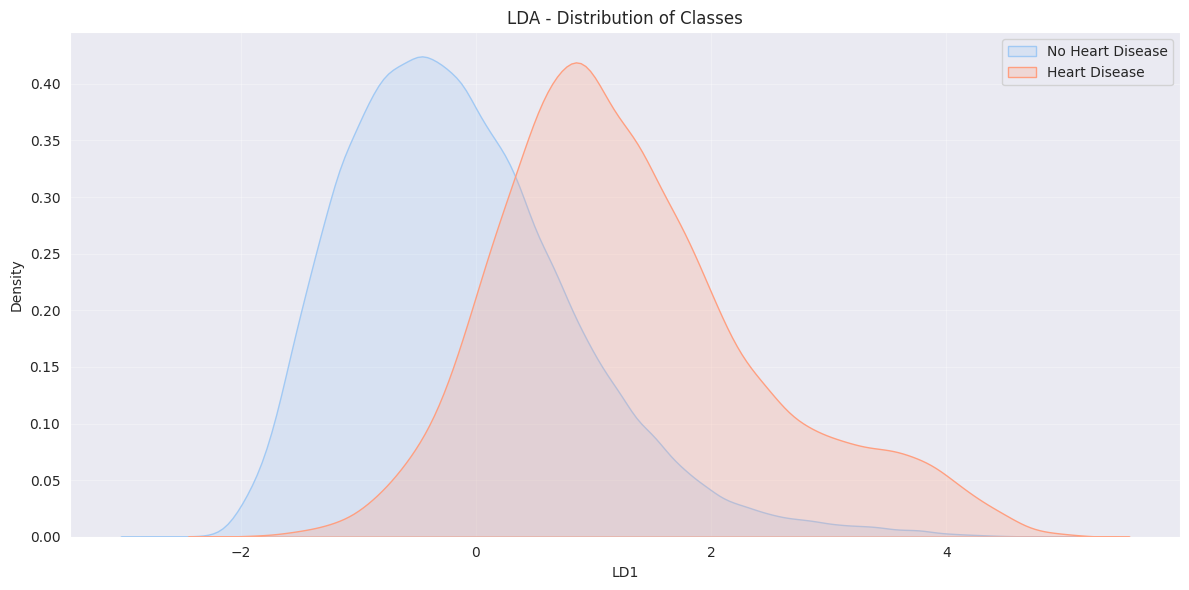

In [13]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda_transformed = lda.fit_transform(X_scaled, y)

print("\nLDA:")
print(f"Shape of transformed data: {lda_transformed.shape}")

plt.figure(figsize=(12, 6))
sns.kdeplot(lda_transformed[y == 0.0][:, 0], fill=True, color=NO_DISEASE_COLOR, label='No Heart Disease')
sns.kdeplot(lda_transformed[y == 1.0][:, 0], fill=True, color=DISEASE_COLOR, label='Heart Disease')
plt.title('LDA - Distribution of Classes')
plt.xlabel('LD1')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('pictures/lda/lda_distribution.jpg', dpi=300)

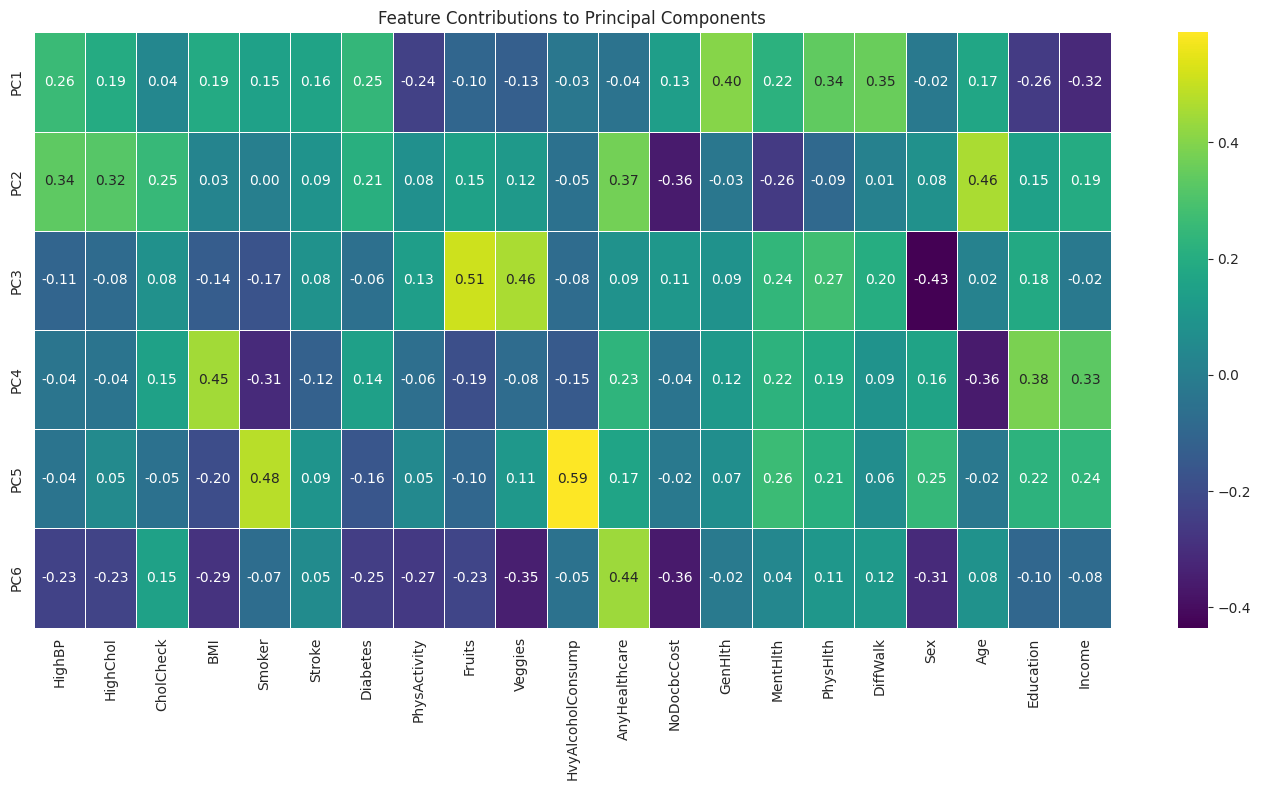

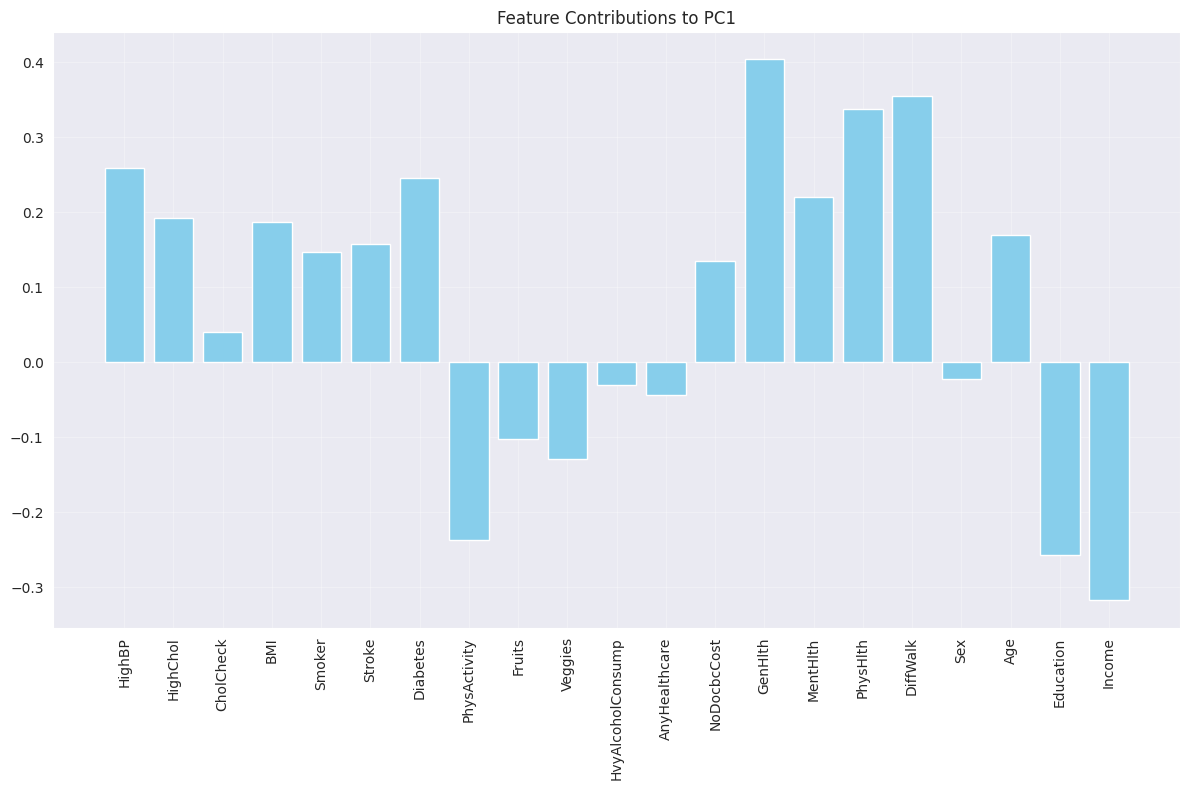

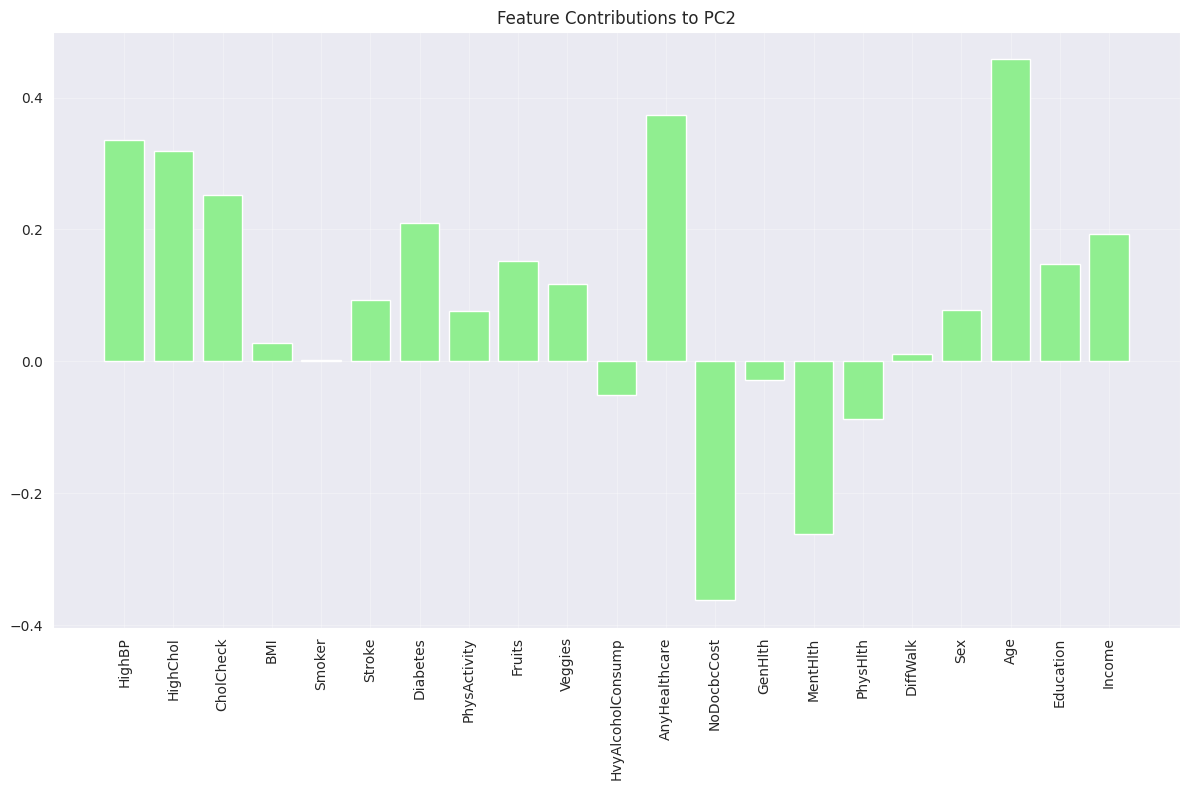

In [14]:
# Phân tích đóng góp của từng feature vào các principal components
components = pd.DataFrame(pca.components_, 
                         columns=X.columns, 
                         index=[f'PC{i+1}' for i in range(pca.components_.shape[0])])

# Heatmap hiển thị đóng góp của các feature
plt.figure(figsize=(14, 8))
sns.heatmap(components, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Feature Contributions to Principal Components')
plt.tight_layout()
plt.savefig('pictures/pca_feature_contributions.jpg', dpi=300)
plt.show()

# Vẽ biểu đồ đóng góp của từng feature vào PC1 và PC2
plt.figure(figsize=(12, 8))
plt.bar(X.columns, components.iloc[0], color='skyblue')
plt.title('Feature Contributions to PC1')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pictures/pc1_feature_contributions.jpg', dpi=300)
plt.show()

plt.figure(figsize=(12, 8))
plt.bar(X.columns, components.iloc[1], color='lightgreen')
plt.title('Feature Contributions to PC2')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pictures/pc2_feature_contributions.jpg', dpi=300)
plt.show()

**NHẬN XÉT:** Nhìn chung, các phương pháp giảm chiều được sử dụng vẫn chưa tách biệt được các lớp dữ liệu.